# 13wk-52: 취업(오버피팅) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

[????](????)

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.model_selection
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [2]:
np.random.randn(43052)
n_balance = 10 
toeic = np.random.randint(0,199,size=5000)*5
gpa = np.random.randint(100,450,size=5000)/100
u = toeic * 8/995 + gpa * 10/4.5
u = u - np.mean(u)
v = np.exp(u)/(1+np.exp(u))
employment = np.random.binomial(n=1,p=v)
df = pd.DataFrame({
'toiec':toeic,
'gpa':gpa,
'employment':employment
})
df_balance = pd.DataFrame((np.random.randn(5000,n_balance)).reshape(5000,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)]) > 0
df = pd.concat([df,df_balance],axis=1).assign(employment = lambda df: df.employment.map({0:'No',1:'Yes'}))
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [3]:
df_train

# 4. 적합

In [4]:
# step1 -- pass
# step2 
predictr = TabularPredictor(label = 'employment')
# step3 
predictr.fit(df_train,num_gpus=1)
# step4 
yhat = predictr.predict(df_train)
yyhat = predictr.predict(df_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_195640/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231130_195640/"
AutoGluon Version:  0.8.1
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   1585.62 GB / 1887.51 GB (84.0%)
Train Data Rows:    1500
Train Data Columns: 12
Label Column: employment
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
    2 unique label values:  ['No', 'Yes']
    If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
    Note: For your binary classification, AutoGluon arbitrarily selected which label-v

In [5]:
predictr.leaderboard(silent=True)

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

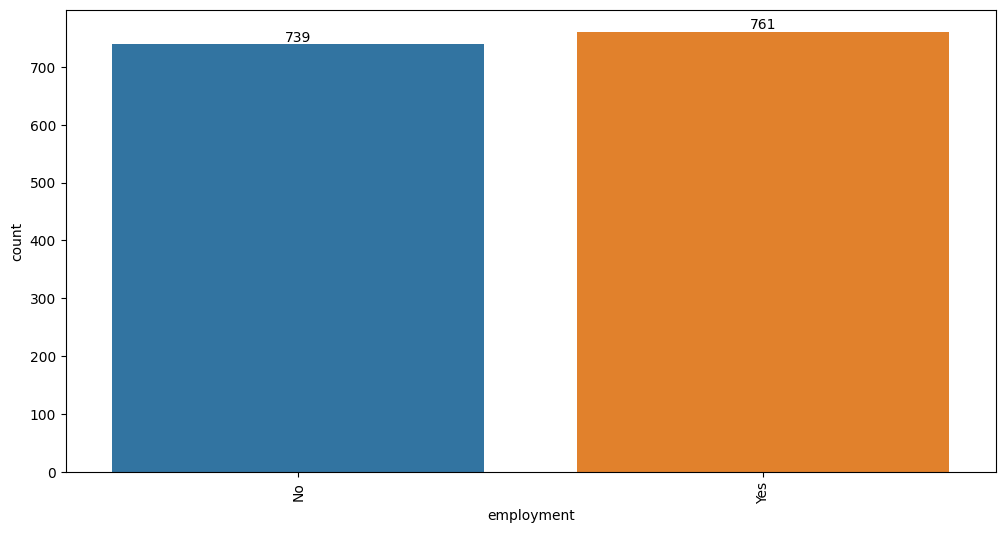

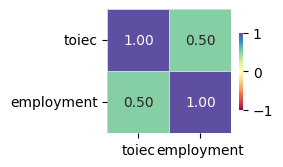

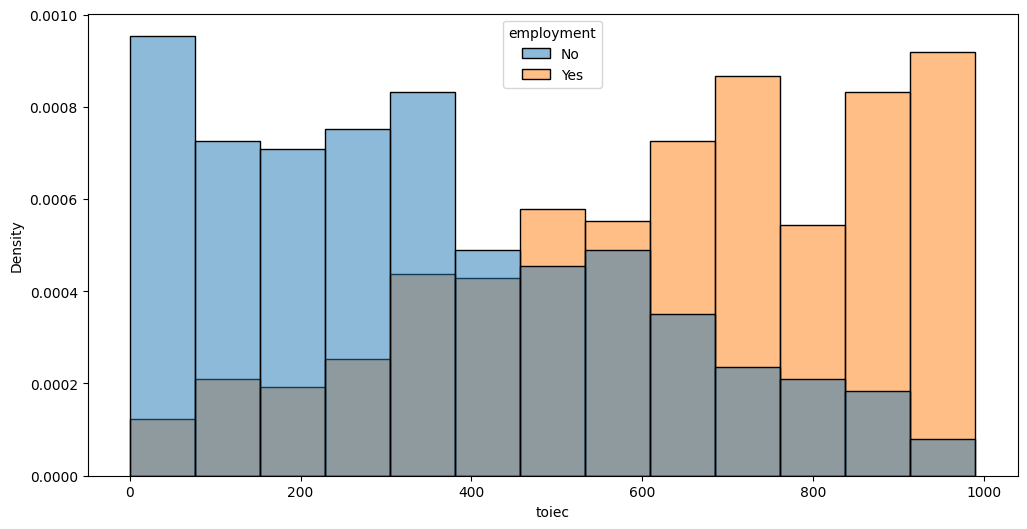

In [282]:
auto.target_analysis(
    train_data=df_train, 
    label='employment',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231130_131659/"

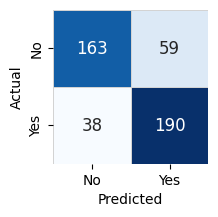

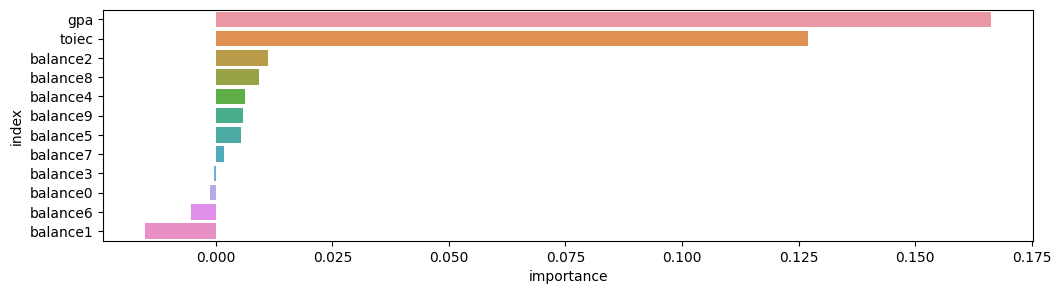

In [283]:
auto.quick_fit(
    train_data = df_train, 
    label='employment',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

In [285]:
predictr.predict_proba(df_train.iloc[[0]])

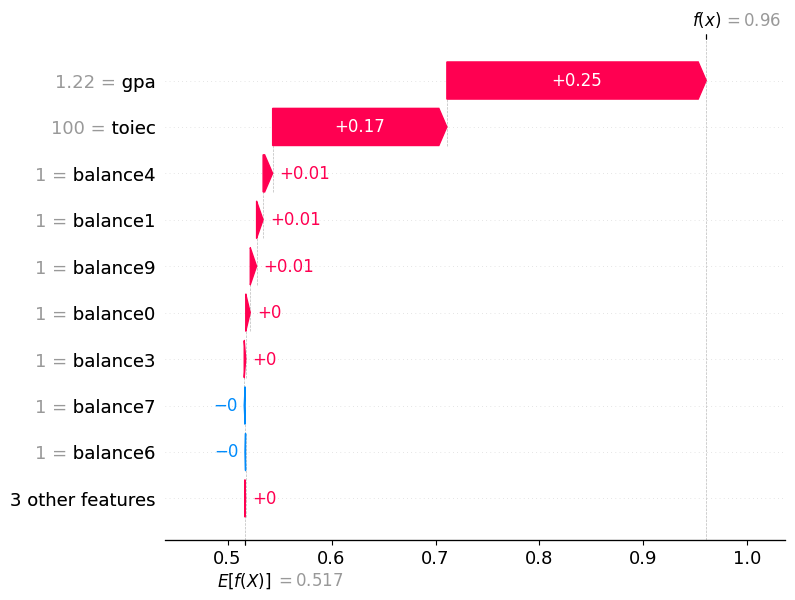

In [286]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    display_rows=True,
    plot='waterfall',
    rows=df_train.iloc[[0]]*1
)